In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.0 MB/s eta 0:00:00


In [ ]:
!pip install category-encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import optuna
from optuna.samplers import TPESampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
customer_df = pd.read_csv('train.csv')
customer_df

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14.0,6.0,12.0,10.0,...,0.0,2.0,0.0,0.0,33.4,1.0,0.0,1.0,17.0,0.0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87.0,3.0,8.0,8.0,...,0.0,2.0,0.0,0.0,84.8,1.0,0.0,3.0,13.0,170.0
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15.0,7.0,11.0,5.0,...,0.0,1.0,0.0,0.0,63.0,1.0,0.0,2.0,16.0,0.0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13.0,6.0,11.0,5.0,...,0.0,3.0,0.0,0.0,43.8,1.0,0.0,2.0,14.0,0.0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47.0,8.0,6.0,10.0,...,0.0,8.0,0.0,0.0,84.8,1.0,1.0,3.0,12.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,3450.0,0,Obara Sand,obara.sand@yahoo.com,Obara,Sand,87.0,8.0,8.0,7.0,...,0.0,3.0,0.0,0.0,212.5,10.0,2.0,3.0,11.0,0.0
1942,5829.0,0,Quentyn Blackwood,quentyn.blackwood@yahoo.com,Quentyn,Blackwood,244.0,4.0,7.0,2.0,...,0.0,3.0,0.0,0.0,282.2,10.0,1.0,4.0,10.0,424.0
1943,1900.0,0,Rhonda Rowan,rhonda.rowan@gmail.com,Rhonda,Rowan,57.0,2.0,8.0,4.0,...,3.0,7.0,0.0,0.0,254.4,10.0,0.0,4.0,12.0,480.0
1944,1600.0,0,Turnip,turnip@yahoo.com,Turnip,Turnip,74.0,3.0,10.0,10.0,...,0.0,3.0,0.0,0.0,564.2,10.0,3.0,3.0,11.0,796.0


In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   float64
 7   UNIQUE_MEALS_PURCH           1946 non-null   float64
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   float64
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   float64
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   float64
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   float64
 13  CANCELLATIONS_AFTE

In [ ]:
customer_df.duplicated().sum()

0

In [ ]:
customer_df[customer_df.isnull().any(axis=1)]

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
20,2012.50,1,Bethany (Blushing Bethany),bethany.(blushing.bethany)@mmm.com,Bethany,NaN,67.0,1.0,4.0,8.0,...,9.0,2.0,0.0,0.0,130.4,2.0,1.0,2.0,16.0,0.0
164,1890.00,1,Barth (brewer),barth.(brewer)@nike.com,Barth,NaN,120.0,6.0,10.0,4.0,...,4.0,5.0,0.0,0.0,122.8,3.0,1.0,3.0,14.0,0.0
224,1740.00,1,Erryk (guard),erryk.(guard)@nike.com,Erryk,NaN,49.0,2.0,8.0,10.0,...,0.0,3.0,1.0,0.0,128.4,3.0,0.0,3.0,13.0,0.0
298,1645.00,1,Mudge (brotherhood),mudge.(brotherhood)@aol.com,Mudge,NaN,14.0,1.0,12.0,7.0,...,0.0,0.0,0.0,0.0,87.6,3.0,1.0,3.0,14.0,0.0
307,1488.00,1,Lew (guard),lew.(guard)@jpmorgan.com,Lew,NaN,49.0,7.0,5.0,1.0,...,4.0,0.0,0.0,0.0,112.0,3.0,1.0,3.0,12.0,165.0
310,1450.00,1,Maerie (Whore),maerie.(whore)@me.com,Maerie,NaN,97.0,3.0,6.0,7.0,...,0.0,4.0,0.0,0.0,125.8,3.0,0.0,3.0,12.0,144.0
357,1566.25,1,Pate (Night's Watch),pate.(night's.watch)@protonmail.com,Pate,NaN,13.0,1.0,11.0,6.0,...,3.0,5.0,0.0,0.0,98.7,3.0,0.0,2.0,16.0,604.0
383,1750.00,1,Will (squire),will.(squire)@passport.com,Will,NaN,43.0,9.0,6.0,4.0,...,0.0,4.0,0.0,0.0,169.1,3.0,0.0,3.0,14.0,0.0
384,1270.00,1,Wyl (guard),wyl.(guard)@travelers.com,Wyl,NaN,93.0,7.0,5.0,10.0,...,0.0,3.0,0.0,0.0,92.5,3.0,0.0,2.0,15.0,0.0
454,800.00,0,Kyle (brotherhood),kyle.(brotherhood)@jpmorgan.com,Kyle,NaN,14.0,8.0,11.0,3.0,...,1.0,8.0,0.0,0.0,86.1,3.0,0.0,3.0,13.0,0.0


In [ ]:
customer_df['FAMILY_NAME'] = customer_df['FAMILY_NAME'].fillna("")
customer_df[20:]

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
20,2012.50,1,Bethany (Blushing Bethany),bethany.(blushing.bethany)@mmm.com,Bethany,,67.0,1.0,4.0,8.0,...,9.0,2.0,0.0,0.0,130.4,2.0,1.0,2.0,16.0,0.0
21,2616.25,1,Blane,blane@merck.com,Blane,Blane,64.0,1.0,7.0,1.0,...,0.0,0.0,0.0,0.0,120.0,2.0,0.0,3.0,15.0,0.0
22,1280.00,1,Bronn,bronn@protonmail.com,Bronn,Bronn,100.0,7.0,4.0,9.0,...,0.0,1.0,0.0,0.0,91.4,2.0,0.0,2.0,17.0,0.0
23,1210.00,1,Bryan Fossoway,bryan.fossoway@gmail.com,Bryan,Fossoway,46.0,3.0,6.0,4.0,...,3.0,2.0,0.0,0.0,95.2,2.0,1.0,2.0,17.0,0.0
24,2115.00,1,Calon,calon@protonmail.com,Calon,Calon,135.0,9.0,7.0,2.0,...,1.0,1.0,0.0,0.0,122.6,2.0,2.0,3.0,12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,3450.00,0,Obara Sand,obara.sand@yahoo.com,Obara,Sand,87.0,8.0,8.0,7.0,...,0.0,3.0,0.0,0.0,212.5,10.0,2.0,3.0,11.0,0.0
1942,5829.00,0,Quentyn Blackwood,quentyn.blackwood@yahoo.com,Quentyn,Blackwood,244.0,4.0,7.0,2.0,...,0.0,3.0,0.0,0.0,282.2,10.0,1.0,4.0,10.0,424.0
1943,1900.00,0,Rhonda Rowan,rhonda.rowan@gmail.com,Rhonda,Rowan,57.0,2.0,8.0,4.0,...,3.0,7.0,0.0,0.0,254.4,10.0,0.0,4.0,12.0,480.0
1944,1600.00,0,Turnip,turnip@yahoo.com,Turnip,Turnip,74.0,3.0,10.0,10.0,...,0.0,3.0,0.0,0.0,564.2,10.0,3.0,3.0,11.0,796.0


In [ ]:
email = customer_df['EMAIL']
for row in email.index:
    tag = customer_df.at[row, 'EMAIL'].split("@")[1]
    customer_df.at[row, 'EMAIL'] = tag
customer_df

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,unitedhealth.com,Saathos,Saathos,14.0,6.0,12.0,10.0,...,0.0,2.0,0.0,0.0,33.4,1.0,0.0,1.0,17.0,0.0
1,1365.0,1,Alysanne Osgrey,ge.org,Alysanne,Osgrey,87.0,3.0,8.0,8.0,...,0.0,2.0,0.0,0.0,84.8,1.0,0.0,3.0,13.0,170.0
2,800.0,1,Edwyd Fossoway,jnj.com,Edwyd,Fossoway,15.0,7.0,11.0,5.0,...,0.0,1.0,0.0,0.0,63.0,1.0,0.0,2.0,16.0,0.0
3,600.0,1,Eleyna Westerling,ge.org,Eleyna,Westerling,13.0,6.0,11.0,5.0,...,0.0,3.0,0.0,0.0,43.8,1.0,0.0,2.0,14.0,0.0
4,1490.0,1,Elyn Norridge,jnj.com,Elyn,Norridge,47.0,8.0,6.0,10.0,...,0.0,8.0,0.0,0.0,84.8,1.0,1.0,3.0,12.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,3450.0,0,Obara Sand,yahoo.com,Obara,Sand,87.0,8.0,8.0,7.0,...,0.0,3.0,0.0,0.0,212.5,10.0,2.0,3.0,11.0,0.0
1942,5829.0,0,Quentyn Blackwood,yahoo.com,Quentyn,Blackwood,244.0,4.0,7.0,2.0,...,0.0,3.0,0.0,0.0,282.2,10.0,1.0,4.0,10.0,424.0
1943,1900.0,0,Rhonda Rowan,gmail.com,Rhonda,Rowan,57.0,2.0,8.0,4.0,...,3.0,7.0,0.0,0.0,254.4,10.0,0.0,4.0,12.0,480.0
1944,1600.0,0,Turnip,yahoo.com,Turnip,Turnip,74.0,3.0,10.0,10.0,...,0.0,3.0,0.0,0.0,564.2,10.0,3.0,3.0,11.0,796.0


In [ ]:
customer_df.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME',
       'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
       'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
       'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
       'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS',
       'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
       'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME',
       'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
       'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'],
      dtype='object')

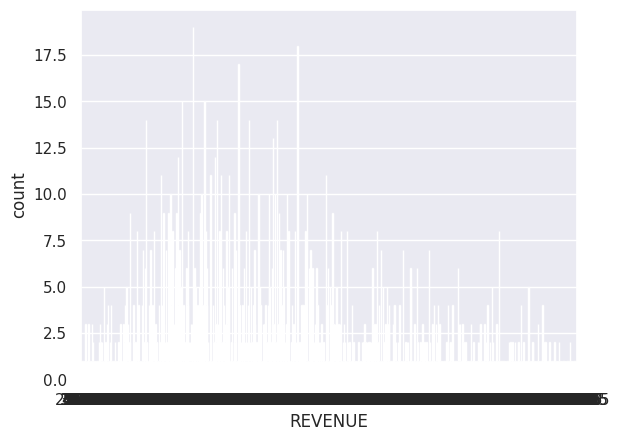

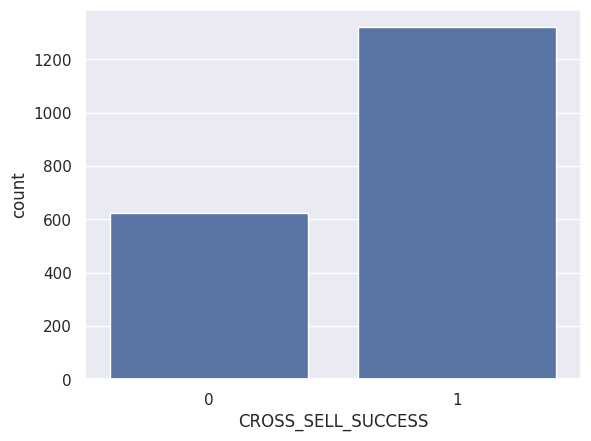

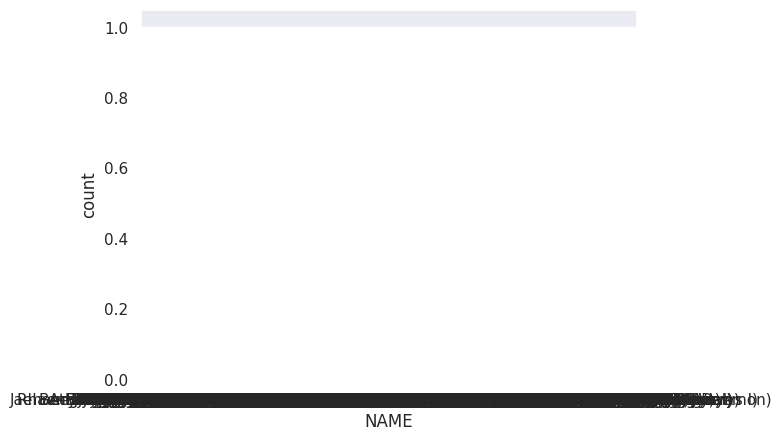

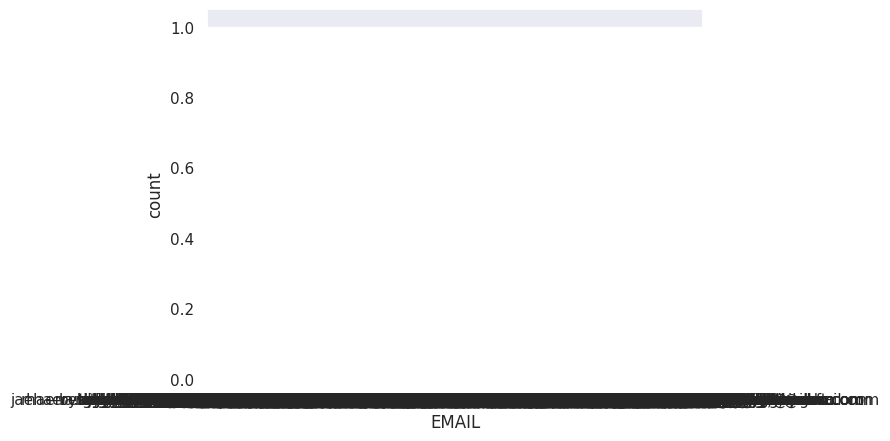

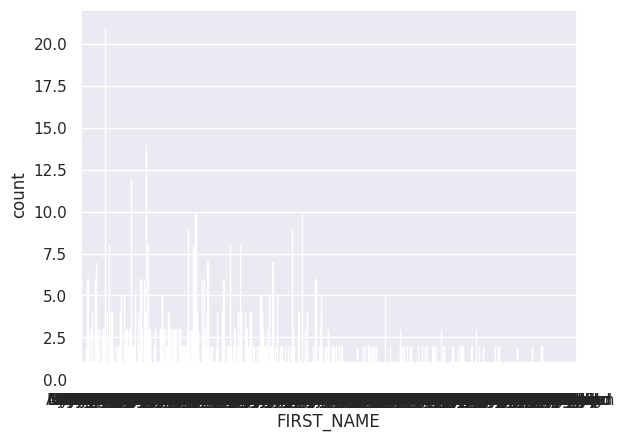

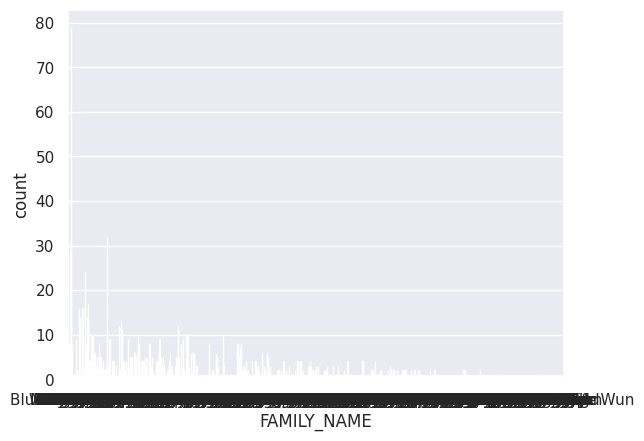

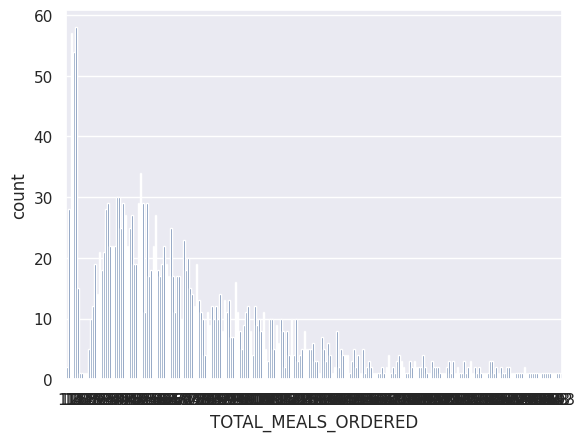

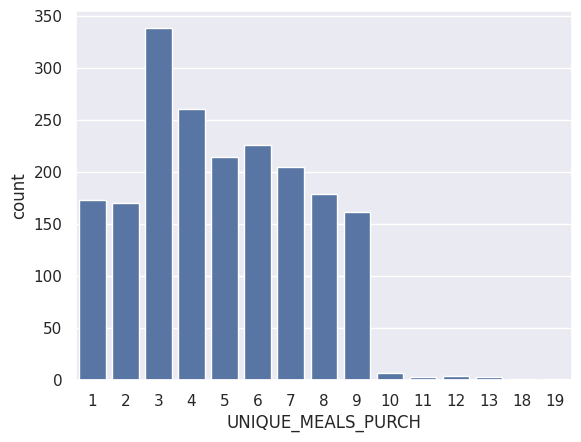

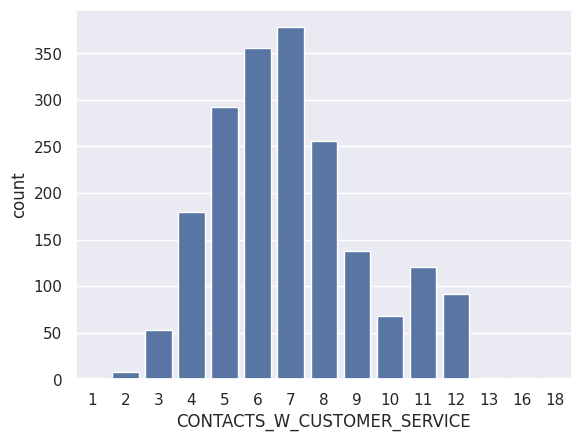

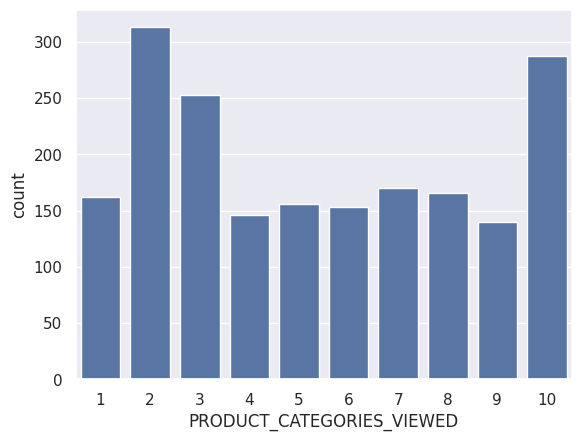

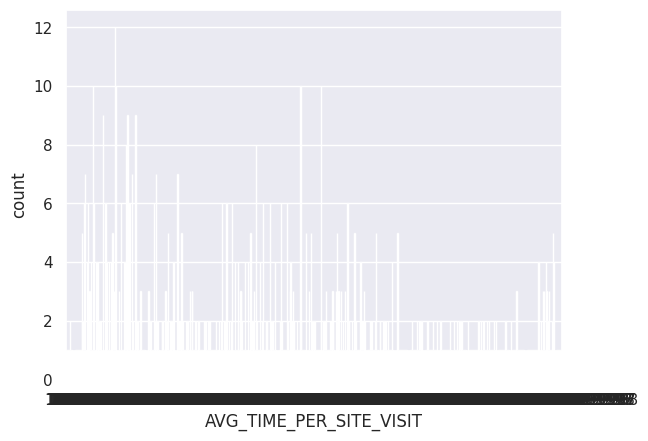

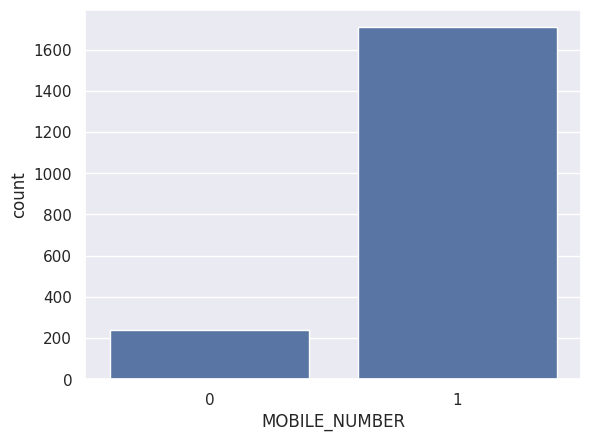

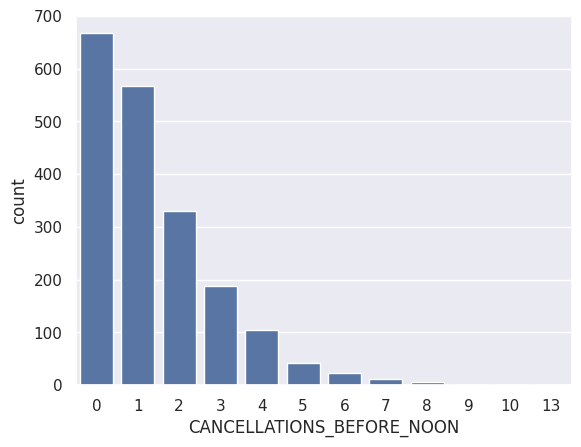

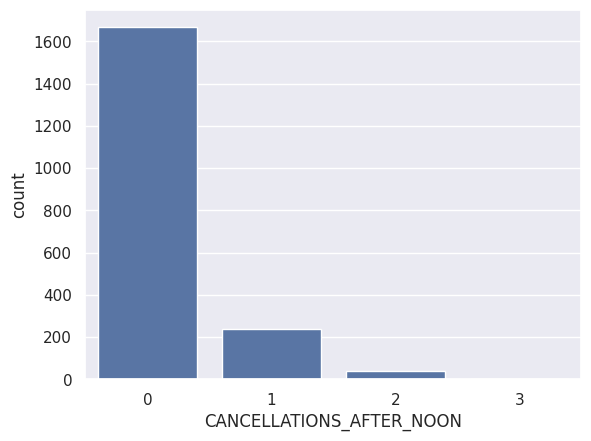

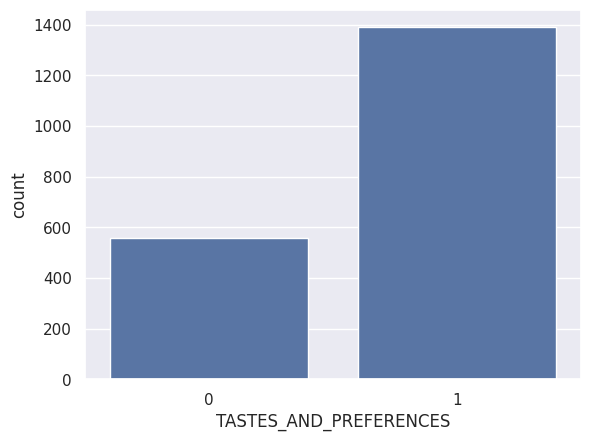

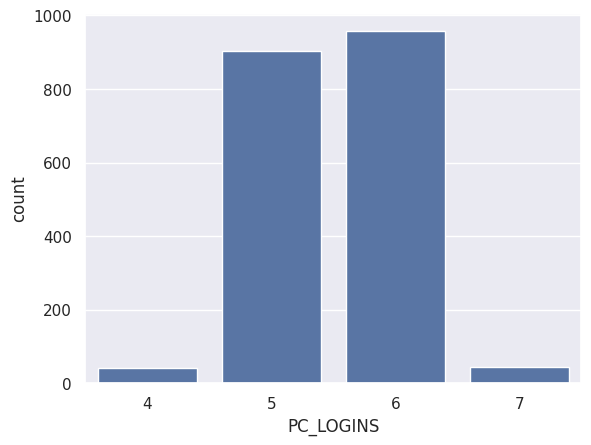

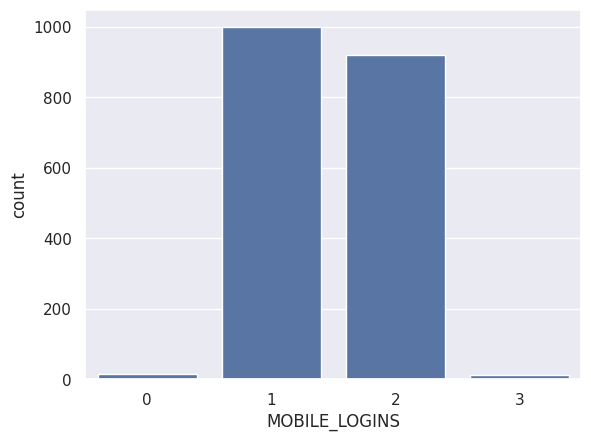

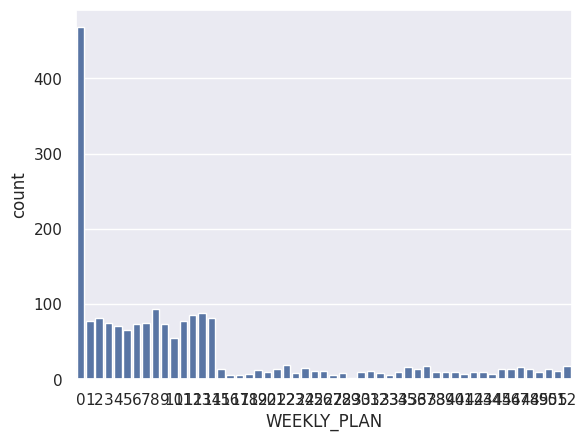

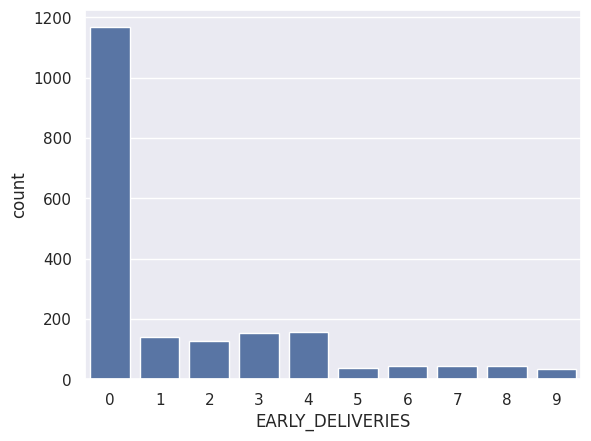

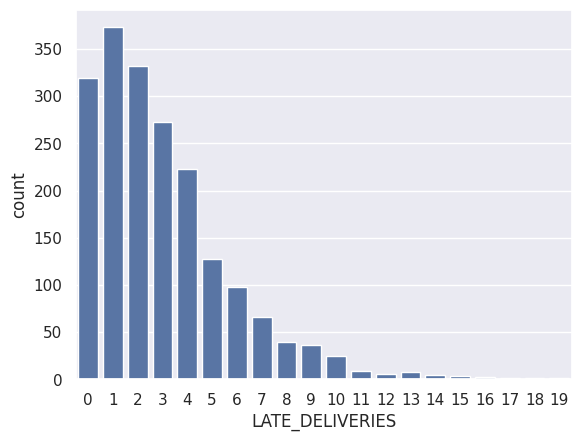

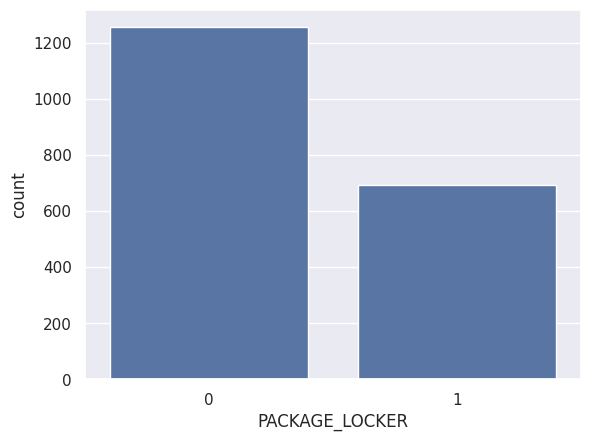

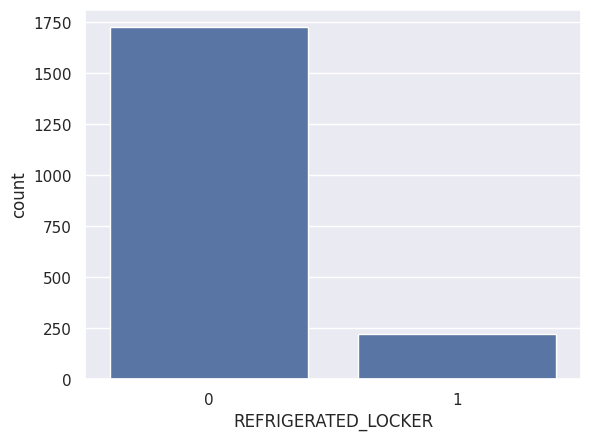

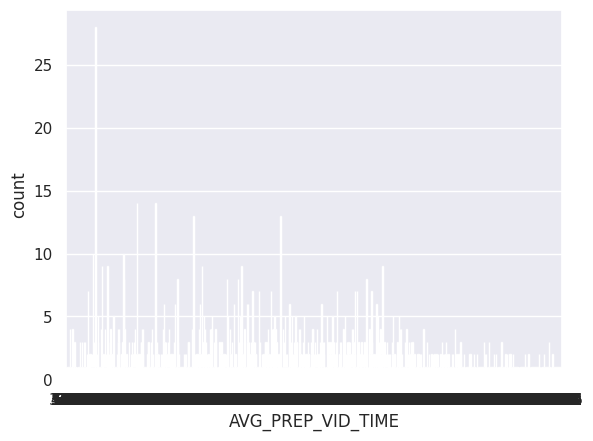

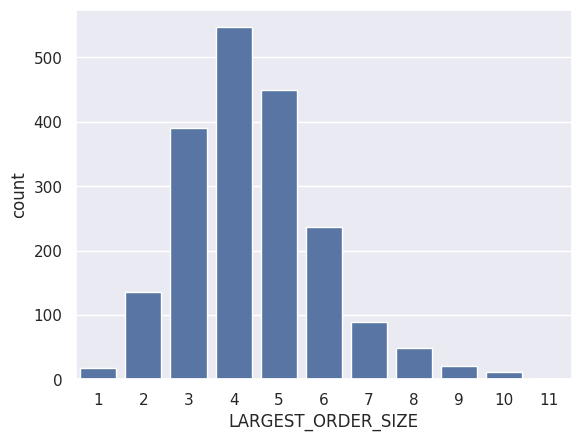

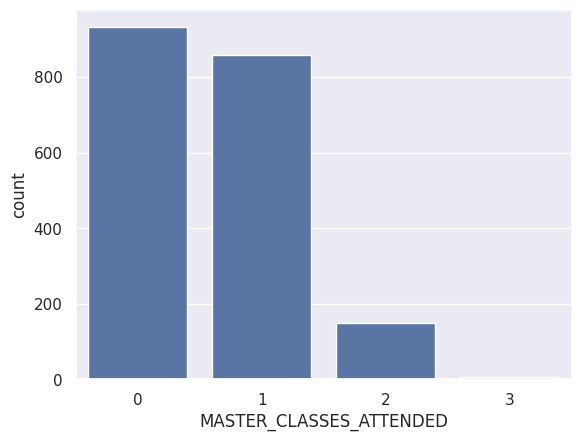

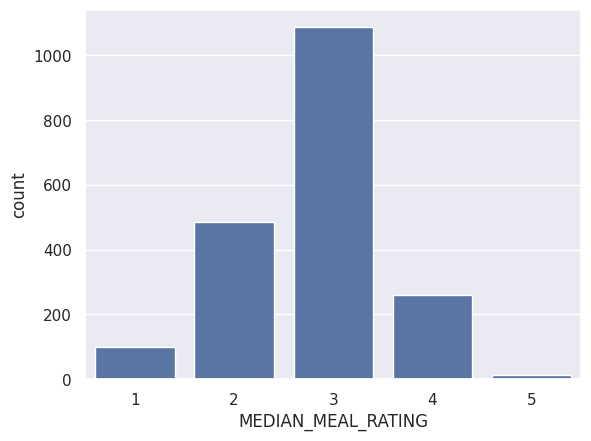

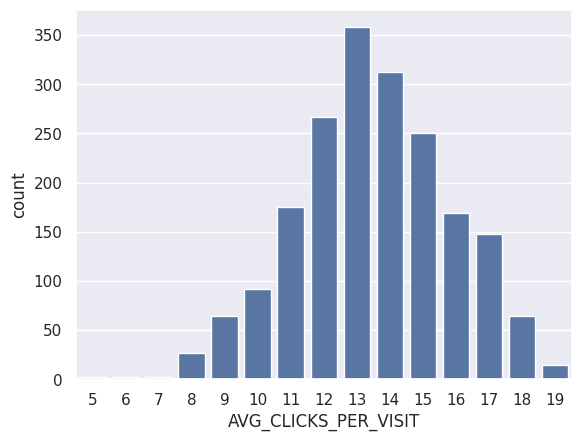

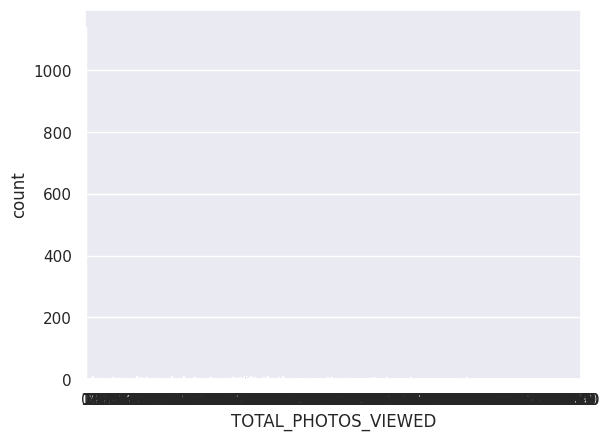

In [ ]:
sns.set(font_scale=1)

for x in customer_df.columns:
    sns.countplot(x=x, data=customer_df)
    plt.show()

In [ ]:
customer_df.drop(["NAME"], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
customer_df['FAMILY_NAME'] = encoder.fit_transform(customer_df['FAMILY_NAME'])
customer_df['EMAIL'] = encoder.fit_transform(customer_df['EMAIL'])
customer_df['FIRST_NAME'] = encoder.fit_transform(customer_df['FIRST_NAME'])
customer_df

,REVENUE,CROSS_SELL_SUCCESS,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,...,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,33,1160,786,14.0,6.0,12.0,10.0,48.00,...,0.0,2.0,0.0,0.0,33.4,1.0,0.0,1.0,17.0,0.0
1,1365.0,1,11,46,662,87.0,3.0,8.0,8.0,40.35,...,0.0,2.0,0.0,0.0,84.8,1.0,0.0,3.0,13.0,170.0
2,800.0,1,18,362,290,15.0,7.0,11.0,5.0,19.77,...,0.0,1.0,0.0,0.0,63.0,1.0,0.0,2.0,16.0,0.0
3,600.0,1,11,375,982,13.0,6.0,11.0,5.0,90.00,...,0.0,3.0,0.0,0.0,43.8,1.0,0.0,2.0,14.0,0.0
4,1490.0,1,18,385,644,47.0,8.0,6.0,10.0,40.38,...,0.0,8.0,0.0,0.0,84.8,1.0,1.0,3.0,12.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,3450.0,0,38,949,789,87.0,8.0,8.0,7.0,108.90,...,0.0,3.0,0.0,0.0,212.5,10.0,2.0,3.0,11.0,0.0
1942,5829.0,0,38,1048,78,244.0,4.0,7.0,2.0,133.91,...,0.0,3.0,0.0,0.0,282.2,10.0,1.0,4.0,10.0,424.0
1943,1900.0,0,12,1099,769,57.0,2.0,8.0,4.0,102.71,...,3.0,7.0,0.0,0.0,254.4,10.0,0.0,4.0,12.0,480.0
1944,1600.0,0,38,1312,918,74.0,3.0,10.0,10.0,638.87,...,0.0,3.0,0.0,0.0,564.2,10.0,3.0,3.0,11.0,796.0


In [ ]:
from sklearn.model_selection import train_test_split

X = customer_df.drop('CROSS_SELL_SUCCESS', axis=1, inplace=False)
y = customer_df['CROSS_SELL_SUCCESS']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1556, 26), (390, 26), (1556,), (390,))

In [ ]:
def objective(trial):
    param_grid = {
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'splitter': trial.suggest_categorical('splitter', ['best', 'random']),
        'max_depth': trial.suggest_int('max_depth', 1, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 50),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 50),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.5),
        'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 2, 50),
        'ccp_alpha': trial.suggest_float("ccp_alpha", 1e-4, 0.1, log=True),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', None])
    }
    model = DecisionTreeClassifier(**param_grid, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = roc_auc_score(y_val, y_pred)
    return score

sampler = TPESampler(seed=42)
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=2500)

[I 2025-03-06 02:39:36,443] A new study created in memory with name: no-name-f31bab04-fdb0-4903-bbe8-d6f609d7c680
[I 2025-03-06 02:39:36,457] Trial 0 finished with value: 0.5 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'min_weight_fraction_leaf': 0.010292247147901223, 'max_leaf_nodes': 49, 'ccp_alpha': 0.03142880890840111, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.5.
[I 2025-03-06 02:39:36,470] Trial 1 finished with value: 0.5 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 9, 'min_samples_split': 31, 'min_samples_leaf': 7, 'max_features': None, 'min_weight_fraction_leaf': 0.3925879806965068, 'max_leaf_nodes': 11, 'ccp_alpha': 0.003489018845491387, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.5.
[I 2025-03-06 02:39:36,485] Trial 2 finished with value: 0.5569811320754716 and parameters: {'criterion': 'gini', 'splitter': 'random'

In [ ]:
def target_encode(train, valid, col, target="CROSS_SELL_SUCCESS", kfold=5, smooth=20, agg="mean"):
    train['kfold'] = ((train.index) % kfold)
    col_name = '_'.join(col)
    train[f'TE_{agg.upper()}_' + col_name] = 0.
    for i in range(kfold):
        df_tmp = train[train['kfold'] != i]
        if agg == "mean": mn = train[target].mean()
        elif agg == "median": mn = train[target].median()
        elif agg == "min": mn = train[target].min()
        elif agg == "max": mn = train[target].max()
        elif agg == "nunique": mn = 0
        df_tmp = df_tmp[col + [target]].groupby(col).agg([agg, 'count']).reset_index()
        df_tmp.columns = col + [agg, 'count']
        if agg == "nunique":
            df_tmp['TE_tmp'] = df_tmp[agg] / df_tmp['count']
        else:
            df_tmp['TE_tmp'] = ((df_tmp[agg] * df_tmp['count']) + (mn * smooth)) / (df_tmp['count'] + smooth)
        df_tmp_m = train[col + ['kfold', f'TE_{agg.upper()}_' + col_name]].merge(df_tmp, how='left', left_on=col, right_on=col)
        df_tmp_m.loc[df_tmp_m['kfold'] == i, f'TE_{agg.upper()}_' + col_name] = df_tmp_m.loc[df_tmp_m['kfold'] == i, 'TE_tmp']
        train[f'TE_{agg.upper()}_' + col_name] = df_tmp_m[f'TE_{agg.upper()}_' + col_name].fillna(mn).values

    df_tmp = train[col + [target]].groupby(col).agg([agg, 'count']).reset_index()
    if agg == "mean": mn = train[target].mean()
    elif agg == "median": mn = train[target].median()
    elif agg == "min": mn = train[target].min()
    elif agg == "max": mn = train[target].max()
    elif agg == "nunique": mn = 0
    df_tmp.columns = col + [agg, 'count']
    if agg == "nunique":
        df_tmp['TE_tmp'] = df_tmp[agg] / df_tmp['count']
    else:
        df_tmp['TE_tmp'] = ((df_tmp[agg] * df_tmp['count']) + (mn * smooth)) / (df_tmp['count'] + smooth)
    df_tmp_m = valid[col].merge(df_tmp, how='left', left_on=col, right_on=col)
    valid[f'TE_{agg.upper()}_' + col_name] = df_tmp_m['TE_tmp'].fillna(mn).values
    valid[f'TE_{agg.upper()}_' + col_name] = valid[f'TE_{agg.upper()}_' + col_name].astype("float32")

    train = train.drop('kfold', axis=1)
    train[f'TE_{agg.upper()}_' + col_name] = train[f'TE_{agg.upper()}_' + col_name].astype("float32")

    return (train, valid)

def count_encode(train, valid, col):
    count_enc = ce.CountEncoder()
    train_type = train[col].dtype
    valid_type = valid[col].dtype
    train[col] = train[col].astype('category')
    valid[col] = valid[col].astype('category')
    train[f'CE_{col}'] = count_enc.fit_transform(train[col])
    valid[f'CE_{col}'] = count_enc.transform(valid[col])
    train[col] = train[col].astype(train_type)
    valid[col] = valid[col].astype(valid_type)
    return (train, valid)

def score():
    param_grid = study.best_params
    model = DecisionTreeClassifier(**param_grid, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = roc_auc_score(y_val, y_pred)
    return score

In [ ]:
columns = X_train.columns
best_score = score()
added_cols = []

for i in range(len(columns) - 1):
    for j in range(i + 1, len(columns)):
        name = columns[i] + "_" + columns[j]
        X_train[name] = X_train[columns[i]].astype(str) + "_" + X_train[columns[j]].astype(str)
        X_val[name] = X_val[columns[i]].astype(str) + "_" + X_val[columns[j]].astype(str)
        X_train, X_val = target_encode(pd.concat([X_train, y_train], axis=1), X_val, [name], smooth=10, agg="mean")
        X_train = X_train.drop('CROSS_SELL_SUCCESS', axis=1)
        X_train, X_val = count_encode(X_train, X_val, name)
        combined = pd.concat([X_train, X_val])
        combined[name], _ = combined[name].factorize()
        X_train = combined[:len(X_train)]
        X_val = combined[len(X_train):]
        new_score = score()
        if new_score > best_score:
            best_score = new_score
            added_cols.append((columns[i], columns[j]))
        else:
            X_train = X_train.drop(name, axis=1)
            X_val = X_val.drop(name, axis=1)
            X_train = X_train.drop(f'TE_MEAN_{name}', axis=1)
            X_val = X_val.drop(f'TE_MEAN_{name}', axis=1)
            X_train = X_train.drop(f'CE_{name}', axis=1)
            X_val = X_val.drop(f'CE_{name}', axis=1)
        print(str(i) + " " * (2 - len(str(i))), str(j) + " " * (2 - len(str(j))), str(name) + " " * (53 - len(str(name))), format(new_score, '.4f'), format(best_score, '.4f'), (new_score == best_score))

for i in added_cols:
    print(i)

0  1  REVENUE_EMAIL                                         0.5318 0.5871 False
0  2  REVENUE_FIRST_NAME                                    0.5235 0.5871 False
0  3  REVENUE_FAMILY_NAME                                   0.5385 0.5871 False
0  4  REVENUE_TOTAL_MEALS_ORDERED                           0.5385 0.5871 False
0  5  REVENUE_UNIQUE_MEALS_PURCH                            0.5225 0.5871 False
0  6  REVENUE_CONTACTS_W_CUSTOMER_SERVICE                   0.5421 0.5871 False
0  7  REVENUE_PRODUCT_CATEGORIES_VIEWED                     0.5353 0.5871 False
0  8  REVENUE_AVG_TIME_PER_SITE_VISIT                       0.5385 0.5871 False
0  9  REVENUE_MOBILE_NUMBER                                 0.5411 0.5871 False
0  10 REVENUE_CANCELLATIONS_BEFORE_NOON                     0.5316 0.5871 False
0  11 REVENUE_CANCELLATIONS_AFTER_NOON                      0.5385 0.5871 False
0  12 REVENUE_TASTES_AND_PREFERENCES                        0.5385 0.5871 False
0  13 REVENUE_PC_LOGINS                 

In [ ]:
for a in range(len(columns) - 2):
    for b in range(a + 1, len(columns) - 1):
        for c in range(b + 1, len(columns)):
            name = columns[a] + "_" + columns[b] + "_" + columns[c]
            X_train[name] = X_train[columns[a]].astype(str) + "_" + X_train[columns[b]].astype(str) + "_" + X_train[columns[c]].astype(str)
            X_val[name] = X_val[columns[a]].astype(str) + "_" + X_val[columns[b]].astype(str) + "_" + X_val[columns[c]].astype(str)
            X_train, X_val = target_encode(pd.concat([X_train, y_train], axis=1), X_val, [name], smooth=10, agg="mean")
            X_train = X_train.drop('CROSS_SELL_SUCCESS', axis=1)
            X_train, X_val = count_encode(X_train, X_val, name)
            combined = pd.concat([X_train, X_val])
            combined[name], _ = combined[name].factorize()
            X_train = combined[:len(X_train)]
            X_val = combined[len(X_train):]
            new_score = score()
            if new_score > best_score:
                best_score = new_score
                added_cols.append((columns[a], columns[b], columns[c]))
            else:
                X_train = X_train.drop(name, axis=1)
                X_val = X_val.drop(name, axis=1)
                X_train = X_train.drop(f'TE_MEAN_{name}', axis=1)
                X_val = X_val.drop(f'TE_MEAN_{name}', axis=1)
                X_train = X_train.drop(f'CE_{name}', axis=1)
                X_val = X_val.drop(f'CE_{name}', axis=1)
            print(str(a) + " " * (2 - len(str(a))), str(b) + " " * (2 - len(str(b))), str(c) + " " * (2 - len(str(c))), str(name) + " " * (79 - len(str(name))), format(new_score, '.4f'), format(best_score, '.4f'), (new_score == best_score))

for i in added_cols:
    print(i)

0  1  2  REVENUE_EMAIL_FIRST_NAME                                                        0.6534 0.6534 True
0  1  3  REVENUE_EMAIL_FAMILY_NAME                                                       0.6252 0.6534 False
0  1  4  REVENUE_EMAIL_TOTAL_MEALS_ORDERED                                               0.6076 0.6534 False
0  1  5  REVENUE_EMAIL_UNIQUE_MEALS_PURCH                                                0.6174 0.6534 False
0  1  6  REVENUE_EMAIL_CONTACTS_W_CUSTOMER_SERVICE                                       0.6331 0.6534 False
0  1  7  REVENUE_EMAIL_PRODUCT_CATEGORIES_VIEWED                                         0.6180 0.6534 False
0  1  8  REVENUE_EMAIL_AVG_TIME_PER_SITE_VISIT                                           0.6147 0.6534 False
0  1  9  REVENUE_EMAIL_MOBILE_NUMBER                                                     0.6180 0.6534 False
0  1  10 REVENUE_EMAIL_CANCELLATIONS_BEFORE_NOON                                         0.6180 0.6534 False
0  1  11 REVENUE_EMA

In [ ]:
for a in range(len(columns) - 3):
    for b in range(a + 1, len(columns) - 2):
        for c in range(b + 1, len(columns) - 1):
            for d in range(c + 1, len(columns)):
                name = columns[a] + "_" + columns[b] + "_" + columns[c] + "_" + columns[d]
                X_train[name] = X_train[columns[a]].astype(str) + "_" + X_train[columns[b]].astype(str) + "_" + X_train[columns[c]].astype(str) + "_" + X_train[columns[d]].astype(str)
                X_val[name] = X_val[columns[a]].astype(str) + "_" + X_val[columns[b]].astype(str) + "_" + X_val[columns[c]].astype(str) + "_" + X_val[columns[d]].astype(str)
                X_train, X_val = target_encode(pd.concat([X_train, y_train], axis=1), X_val, [name], smooth=10, agg="mean")
                X_train = X_train.drop('CROSS_SELL_SUCCESS', axis=1)
                X_train, X_val = count_encode(X_train, X_val, name)
                combined = pd.concat([X_train, X_val])
                combined[name], _ = combined[name].factorize()
                X_train = combined[:len(X_train)]
                X_val = combined[len(X_train):]
                new_score = score()
                if new_score > best_score:
                    best_score = new_score
                    added_cols.append((columns[a], columns[b], columns[c], columns[d]))
                else:
                    X_train = X_train.drop(name, axis=1)
                    X_val = X_val.drop(name, axis=1)
                    X_train = X_train.drop(f'TE_MEAN_{name}', axis=1)
                    X_val = X_val.drop(f'TE_MEAN_{name}', axis=1)
                    X_train = X_train.drop(f'CE_{name}', axis=1)
                    X_val = X_val.drop(f'CE_{name}', axis=1)
                print(str(a) + " " * (2 - len(str(a))), str(b) + " " * (2 - len(str(b))), str(c) + " " * (2 - len(str(c))), str(d) + " " * (2 - len(str(d))), str(name) + " " * (104 - len(str(name))), format(new_score, '.4f'), format(best_score, '.4f'), (new_score == best_score))

for i in added_cols:
    print(i)

Streaming output truncated to the last 5000 lines.
5  15 18 22 UNIQUE_MEALS_PURCH_WEEKLY_PLAN_PACKAGE_LOCKER_MASTER_CLASSES_ATTENDED                                    0.5939 0.6692 False
5  15 18 23 UNIQUE_MEALS_PURCH_WEEKLY_PLAN_PACKAGE_LOCKER_MEDIAN_MEAL_RATING                                         0.5817 0.6692 False
5  15 18 24 UNIQUE_MEALS_PURCH_WEEKLY_PLAN_PACKAGE_LOCKER_AVG_CLICKS_PER_VISIT                                       0.5864 0.6692 False
5  15 18 25 UNIQUE_MEALS_PURCH_WEEKLY_PLAN_PACKAGE_LOCKER_TOTAL_PHOTOS_VIEWED                                        0.6021 0.6692 False
5  15 19 20 UNIQUE_MEALS_PURCH_WEEKLY_PLAN_REFRIGERATED_LOCKER_AVG_PREP_VID_TIME                                     0.5813 0.6692 False
5  15 19 21 UNIQUE_MEALS_PURCH_WEEKLY_PLAN_REFRIGERATED_LOCKER_LARGEST_ORDER_SIZE                                    0.5840 0.6692 False
5  15 19 22 UNIQUE_MEALS_PURCH_WEEKLY_PLAN_REFRIGERATED_LOCKER_MASTER_CLASSES_ATTENDED                               0.5863 0.6

In [ ]:
added_cols = [('EMAIL', 'MOBILE_NUMBER'),
              ('EMAIL', 'TASTES_AND_PREFERENCES'),
              ('EMAIL', 'PC_LOGINS'),
              ('EMAIL', 'MOBILE_LOGINS'),
              ('FAMILY_NAME', 'MOBILE_NUMBER'),
              ('CANCELLATIONS_BEFORE_NOON', 'REFRIGERATED_LOCKER'),
              ('REVENUE', 'EMAIL', 'FIRST_NAME'),
              ('REVENUE', 'FIRST_NAME', 'FAMILY_NAME'),
              ('REVENUE', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER'),
              ('REVENUE', 'EMAIL', 'CANCELLATIONS_BEFORE_NOON', 'WEEKLY_PLAN')]

for i in added_cols:
    if len(i) == 2:
        name = i[0] + "_" + i[1]
        X_train[i[0] + "_" + i[1]] = X_train[i[0]].astype(str) + "_" + X_train[i[1]].astype(str)
        X_val[i[0] + "_" + i[1]] = X_val[i[0]].astype(str) + "_" + X_val[i[1]].astype(str)
    elif len(i) == 3:
        name = i[0] + "_" + i[1] + "_" + i[2]
        X_train[i[0] + "_" + i[1] + "_" + i[2]] = X_train[i[0]].astype(str) + "_" + X_train[i[1]].astype(str) + "_" + X_train[i[2]].astype(str)
        X_val[i[0] + "_" + i[1] + "_" + i[2]] = X_val[i[0]].astype(str) + "_" + X_val[i[1]].astype(str) + "_" + X_val[i[2]].astype(str)
    elif len(i) == 4:
        name = i[0] + "_" + i[1] + "_" + i[2] + "_" + i[3]
        X_train[i[0] + "_" + i[1] + "_" + i[2] + "_" + i[3]] = X_train[i[0]].astype(str) + "_" + X_train[i[1]].astype(str) + "_" + X_train[i[2]].astype(str) + "_" + X_train[i[3]].astype(str)
        X_val[i[0] + "_" + i[1] + "_" + i[2] + "_" + i[3]] = X_val[i[0]].astype(str) + "_" + X_val[i[1]].astype(str) + "_" + X_val[i[2]].astype(str) + "_" + X_val[i[3]].astype(str)
    combined = pd.concat([X_train, X_val])
    combined[name], _ = combined[name].factorize()
    X_train = combined[:len(X_train)]
    X_val = combined[len(X_train):]
    X_train, X_val = target_encode(pd.concat([X_train, y_train], axis=1), X_val, [name], smooth=10, agg="mean")
    X_train = X_train.drop('CROSS_SELL_SUCCESS', axis=1)
    X_train, X_val = count_encode(X_train, X_val, name)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X = pd.concat([X_train, X_val])
y = pd.concat([y_train, y_val])
X, y = smote.fit_resample(X, y)
X_train = X[:len(X_train)]
X_val = X[len(X_train):]
y_train = y[:len(y_train)]
y_val = y[len(y_train):]

In [ ]:
customer_df = pd.concat([pd.concat([X_train, X_val]), pd.concat([y_train, y_val])], axis=1)
customer_df

,REVENUE,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,...,REVENUE_FIRST_NAME_FAMILY_NAME,TE_MEAN_REVENUE_FIRST_NAME_FAMILY_NAME,CE_REVENUE_FIRST_NAME_FAMILY_NAME,REVENUE_AVG_TIME_PER_SITE_VISIT_MOBILE_NUMBER,TE_MEAN_REVENUE_AVG_TIME_PER_SITE_VISIT_MOBILE_NUMBER,CE_REVENUE_AVG_TIME_PER_SITE_VISIT_MOBILE_NUMBER,REVENUE_EMAIL_CANCELLATIONS_BEFORE_NOON_WEEKLY_PLAN,TE_MEAN_REVENUE_EMAIL_CANCELLATIONS_BEFORE_NOON_WEEKLY_PLAN,CE_REVENUE_EMAIL_CANCELLATIONS_BEFORE_NOON_WEEKLY_PLAN,CROSS_SELL_SUCCESS
0,1310.000000,23,768,836,46.000000,9.000000,4.000000,10.000000,65.600000,1.000000,...,0,0.678663,1.0,0,0.678663,1.0,0,0.678663,1.0,1
1,1679.000000,8,381,251,42.000000,2.000000,5.000000,2.000000,94.500000,1.000000,...,1,0.678663,1.0,1,0.678663,1.0,1,0.678663,1.0,0
2,1899.000000,33,171,836,46.000000,5.000000,5.000000,1.000000,138.300000,1.000000,...,2,0.678663,1.0,2,0.678663,1.0,2,0.678663,1.0,1
3,4297.500000,1,734,805,91.000000,3.000000,10.000000,2.000000,120.030000,1.000000,...,3,0.678663,1.0,3,0.678663,1.0,3,0.678663,1.0,1
4,1780.000000,32,1129,168,70.000000,3.000000,8.000000,1.000000,83.740000,1.000000,...,4,0.678663,1.0,4,0.678663,1.0,4,0.678663,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2637,1796.610665,28,418,278,81.459982,3.105834,7.788332,5.470830,89.977281,1.000000,...,461,0.678663,1.0,460,0.678663,1.0,461,0.678663,1.0,0
2638,2642.711737,19,929,700,113.014047,4.107065,5.602019,2.806056,109.611101,1.000000,...,435,0.678663,1.0,434,0.678663,1.0,435,0.678663,1.0,0
2639,3103.383231,38,1062,668,113.191615,3.567665,7.000000,2.378443,80.316323,1.000000,...,851,0.678663,1.0,850,0.678663,1.0,851,0.678663,1.0,0
2640,729.491140,14,911,622,13.763274,3.236726,11.000000,2.591814,170.354377,1.000000,...,1054,0.678663,1.0,1052,0.678663,1.0,1053,0.678663,1.0,0


In [ ]:
param_grid = study.best_params
model = DecisionTreeClassifier(**param_grid, random_state=42)
model.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))

importances = pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_})
importance = importances.sort_values('importance', ascending=False)
importance

,feature,importance
27,TE_MEAN_EMAIL_MOBILE_NUMBER,0.474966
43,CE_CANCELLATIONS_BEFORE_NOON_REFRIGERATED_LOCKER,0.145705
10,CANCELLATIONS_BEFORE_NOON,0.122089
12,TASTES_AND_PREFERENCES,0.071797
42,TE_MEAN_CANCELLATIONS_BEFORE_NOON_REFRIGERATED...,0.069772
1,EMAIL,0.037148
38,FAMILY_NAME_MOBILE_NUMBER,0.035582
13,PC_LOGINS,0.023890
7,PRODUCT_CATEGORIES_VIEWED,0.019053
41,CANCELLATIONS_BEFORE_NOON_REFRIGERATED_LOCKER,0.000000


In [ ]:
acc = score()
print(f"Accuracy: {acc}")

Accuracy: 0.6767885459517845


In [ ]:
X_train.to_csv("X_train.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
X_val.to_csv("X_val.csv", index=False)
y_val.to_csv("y_val.csv", index=False)

In [ ]:
from google.colab import files

files.download("X_train.csv")
files.download("y_train.csv")
files.download("X_val.csv")
files.download("y_val.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>